In [55]:
import collections
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats

# Read the dataset
Rename the columns while we're here.

In [126]:
sea_ice_raw = pd.read_excel('Arctic Sea Ice Extent.xlsx')
sea_ice_raw.columns = ['date', 'extent']
sea_ice_raw.head()

,date,extent
0,1978-10-26,10.231
1,1978-10-28,10.420
2,1978-10-30,10.557
3,1978-11-01,10.670
4,1978-11-03,10.777


In [127]:
sea_ice_raw.tail()

,date,extent
12746,2018-03-27,14.256
12747,2018-03-28,14.302
12748,2018-03-29,14.238
12749,2018-03-30,14.232
12750,2018-03-31,14.271


In [128]:
sea_ice_raw.dtypes

date      datetime64[ns]
extent           float64
dtype: object

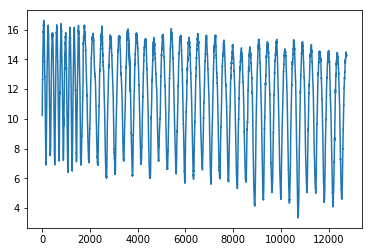

In [129]:
sea_ice_raw.extent.plot()

# Prepare for reshaping
Annotate each entry in the dataset with the year, month, and day of year.

In [130]:
sea_ice_raw['year'] = sea_ice_raw['date'].dt.year
sea_ice_raw['doy'] = sea_ice_raw['date'].dt.dayofyear
sea_ice_raw['month'] = sea_ice_raw['date'].dt.month
sea_ice_raw.head()

,date,extent,year,doy,month
0,1978-10-26,10.231,1978,299,10
1,1978-10-28,10.420,1978,301,10
2,1978-10-30,10.557,1978,303,10
3,1978-11-01,10.670,1978,305,11
4,1978-11-03,10.777,1978,307,11


# One column per year, one row per day
Create a DataFrame with one column per year, and one row per day number.

Plot the data, with each line being a separate year. Pick out the first and last years in the data.

In [7]:
sea_ice_day_year = pd.pivot_table(sea_ice_raw,index='doy',columns='year',values='extent')

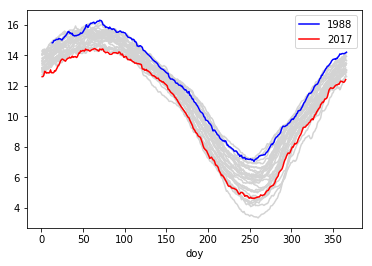

In [116]:
ax = sea_ice_day_year.loc[:, 1989:2016].plot(legend=None, label='_nolegend_', color='lightgrey')
sea_ice_day_year[1988].plot(color='blue', ax=ax, legend=True)
sea_ice_day_year[2017].plot(color='red', ax=ax, legend=True)

# One column per year, one row per month
Aggregate with median, to give an overall value for each month.

In [19]:
sea_ice_month_year = pd.pivot_table(sea_ice_raw,index='month',columns='year',values='extent', aggfunc=np.median)

In [20]:
sea_ice_month_year

year,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,15.5000,14.8940,14.8730,15.2080,14.9650,14.3880,14.7100,14.9860,14.7970,...,14.1150,13.8200,13.4890,13.7030,13.8230,13.6310,13.7520,13.5490,13.0000,13.1230
2,NaN,16.2745,16.0415,15.6375,15.8555,16.0275,15.3350,15.4475,15.8405,15.9645,...,14.8475,14.6685,14.4320,14.6750,14.7675,14.3730,14.4145,14.1800,14.1560,13.8905
3,NaN,16.4355,15.9910,15.6280,15.9685,16.0570,15.5700,15.9355,16.0180,15.7800,...,14.9620,15.1340,14.5450,15.1870,15.0370,14.7200,14.3560,14.3870,14.2730,14.2890
4,NaN,15.5000,15.5090,15.0860,15.4910,15.1450,15.0850,15.4450,15.0190,15.3740,...,14.5190,14.6050,14.1885,14.6600,14.3455,14.0930,13.9875,13.8180,13.7275,NaN
5,NaN,13.8360,13.7570,13.8855,14.0030,13.4675,13.5540,14.0770,13.3010,13.7350,...,13.1700,12.8640,12.6580,13.0080,13.0470,12.6760,12.5120,11.9100,12.6050,NaN
6,NaN,12.5480,12.2690,12.4650,12.6520,12.2760,12.1920,12.2170,11.9650,12.4820,...,11.4410,10.7205,10.7685,10.5215,11.4820,11.1400,10.8890,10.5065,10.7325,NaN
7,NaN,10.3285,10.0745,10.3540,10.3500,10.7670,9.9290,9.7705,10.2110,10.4185,...,8.5120,8.1890,7.5490,7.6060,8.0400,7.9990,8.3980,7.8310,7.7940,NaN
8,NaN,7.9710,7.7650,7.7640,8.0270,8.0105,7.7570,7.3310,7.9100,7.2650,...,6.1430,5.9280,5.4380,4.6190,5.9340,6.0220,5.5390,5.2620,5.3100,NaN
9,NaN,7.0370,7.5800,7.0530,7.2330,7.3210,6.6970,6.6570,7.3280,7.1835,...,5.2270,4.8100,4.5410,3.5335,5.1585,5.1905,4.5105,4.3600,4.7555,NaN


## Medians for each month
These are the median values of ice extent for each month, over the whole dataset.

In [21]:
sea_ice_month_year.median(axis=1)

month
1     14.38800
2     15.29450
3     15.39250
4     14.59650
5     13.13000
6     11.71600
7      9.32600
8      7.20900
9      6.19700
10     8.38000
11    10.63475
12    12.72050
dtype: float64

Now find the difference of each month's extent from the median for that month over all years.

In [25]:
sea_ice_month_year_diff = sea_ice_month_year.subtract(sea_ice_month_year.median(axis=1), axis=0)
sea_ice_month_year_diff

year,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.11200,0.50600,0.48500,0.82000,0.57700,0.00000,0.32200,0.59800,0.40900,...,-0.27300,-0.56800,-0.89900,-0.68500,-0.56500,-0.75700,-0.63600,-0.83900,-1.38800,-1.2650
2,NaN,0.98000,0.74700,0.34300,0.56100,0.73300,0.04050,0.15300,0.54600,0.67000,...,-0.44700,-0.62600,-0.86250,-0.61950,-0.52700,-0.92150,-0.88000,-1.11450,-1.13850,-1.4040
3,NaN,1.04300,0.59850,0.23550,0.57600,0.66450,0.17750,0.54300,0.62550,0.38750,...,-0.43050,-0.25850,-0.84750,-0.20550,-0.35550,-0.67250,-1.03650,-1.00550,-1.11950,-1.1035
4,NaN,0.90350,0.91250,0.48950,0.89450,0.54850,0.48850,0.84850,0.42250,0.77750,...,-0.07750,0.00850,-0.40800,0.06350,-0.25100,-0.50350,-0.60900,-0.77850,-0.86900,NaN
5,NaN,0.70600,0.62700,0.75550,0.87300,0.33750,0.42400,0.94700,0.17100,0.60500,...,0.04000,-0.26600,-0.47200,-0.12200,-0.08300,-0.45400,-0.61800,-1.22000,-0.52500,NaN
6,NaN,0.83200,0.55300,0.74900,0.93600,0.56000,0.47600,0.50100,0.24900,0.76600,...,-0.27500,-0.99550,-0.94750,-1.19450,-0.23400,-0.57600,-0.82700,-1.20950,-0.98350,NaN
7,NaN,1.00250,0.74850,1.02800,1.02400,1.44100,0.60300,0.44450,0.88500,1.09250,...,-0.81400,-1.13700,-1.77700,-1.72000,-1.28600,-1.32700,-0.92800,-1.49500,-1.53200,NaN
8,NaN,0.76200,0.55600,0.55500,0.81800,0.80150,0.54800,0.12200,0.70100,0.05600,...,-1.06600,-1.28100,-1.77100,-2.59000,-1.27500,-1.18700,-1.67000,-1.94700,-1.89900,NaN
9,NaN,0.84000,1.38300,0.85600,1.03600,1.12400,0.50000,0.46000,1.13100,0.98650,...,-0.97000,-1.38700,-1.65600,-2.66350,-1.03850,-1.00650,-1.68650,-1.83700,-1.44150,NaN


In [50]:
sea_ice_month_year_diff.loc[:, 1988:2017]

year,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,,,,,,,,,,
1,0.66300,0.62300,0.35200,0.01600,0.22600,0.59700,0.36900,0.23100,-0.23800,0.02900,...,-0.53900,-0.27300,-0.56800,-0.89900,-0.68500,-0.56500,-0.75700,-0.63600,-0.83900,-1.38800
2,0.18150,0.17650,0.27400,0.06500,0.17150,0.41450,0.25050,-0.06700,-0.10850,0.16900,...,-0.37350,-0.44700,-0.62600,-0.86250,-0.61950,-0.52700,-0.92150,-0.88000,-1.11450,-1.13850
3,0.56750,-0.00450,0.56850,0.04450,0.10050,0.39150,0.15750,-0.12150,-0.27450,0.09550,...,-0.20850,-0.43050,-0.25850,-0.84750,-0.20550,-0.35550,-0.67250,-1.03650,-1.00550,-1.11950
4,0.56150,-0.28950,0.00000,0.23350,0.08650,0.58950,0.26800,-0.19250,-0.41000,-0.13150,...,-0.23850,-0.07750,0.00850,-0.40800,0.06350,-0.25100,-0.50350,-0.60900,-0.77850,-0.86900
5,0.45900,-0.10300,0.14700,0.35000,0.00000,0.24000,0.53800,-0.02300,-0.08000,0.02400,...,-0.08200,0.04000,-0.26600,-0.47200,-0.12200,-0.08300,-0.45400,-0.61800,-1.22000,-0.52500
6,0.29500,0.60600,0.00000,0.37350,0.45850,0.15850,0.30100,-0.20000,0.41400,0.12600,...,-0.48750,-0.27500,-0.99550,-0.94750,-1.19450,-0.23400,-0.57600,-0.82700,-1.20950,-0.98350
7,0.41200,0.83900,-0.16600,0.13200,1.00700,0.00000,0.62900,-0.36800,0.85200,-0.00400,...,-0.63800,-0.81400,-1.13700,-1.77700,-1.72000,-1.28600,-1.32700,-0.92800,-1.49500,-1.53200
8,0.65600,0.67800,-0.48600,0.25500,0.58500,0.03800,0.32400,-0.53400,0.96300,0.06600,...,-1.31600,-1.06600,-1.28100,-1.77100,-2.59000,-1.27500,-1.18700,-1.67000,-1.94700,-1.89900
9,1.08800,0.77500,-0.06500,0.23450,1.12450,0.11550,0.88700,-0.12150,1.31000,0.47400,...,-1.53550,-0.97000,-1.38700,-1.65600,-2.66350,-1.03850,-1.00650,-1.68650,-1.83700,-1.44150


## Quick plot of each year
How each year varies against the median values for each month.

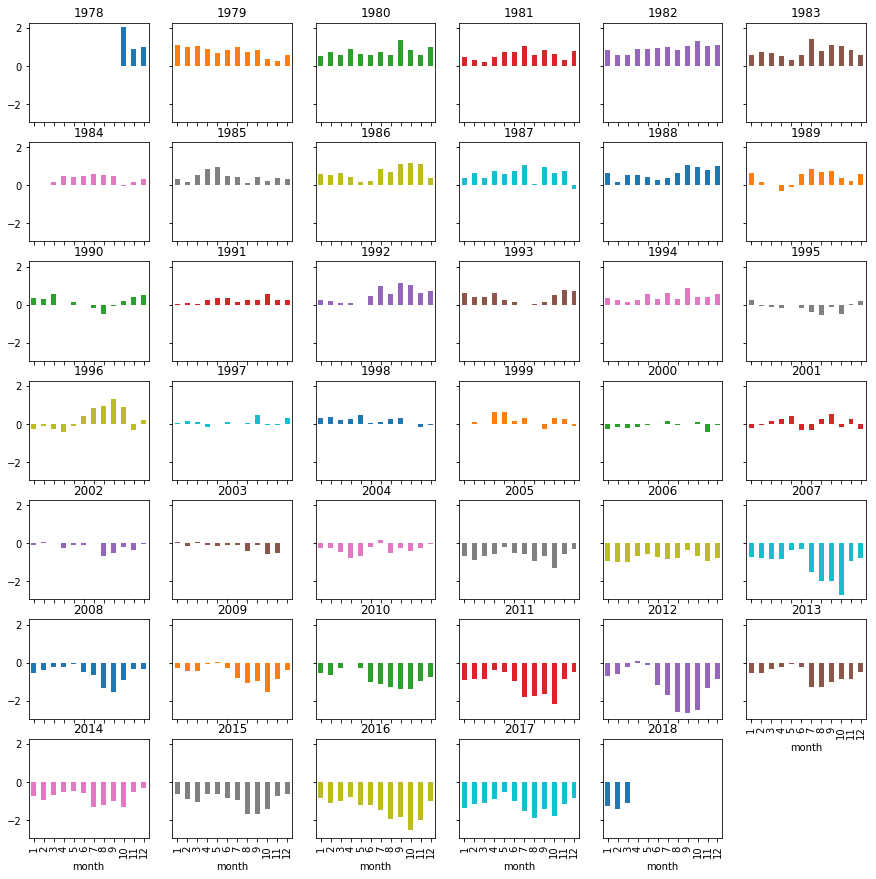

In [33]:
sea_ice_month_year_diff.plot(legend=None, subplots=True, layout=(7, 6), sharey=True, figsize=(15, 15), kind='bar');

Plot just the last 30 complete years.

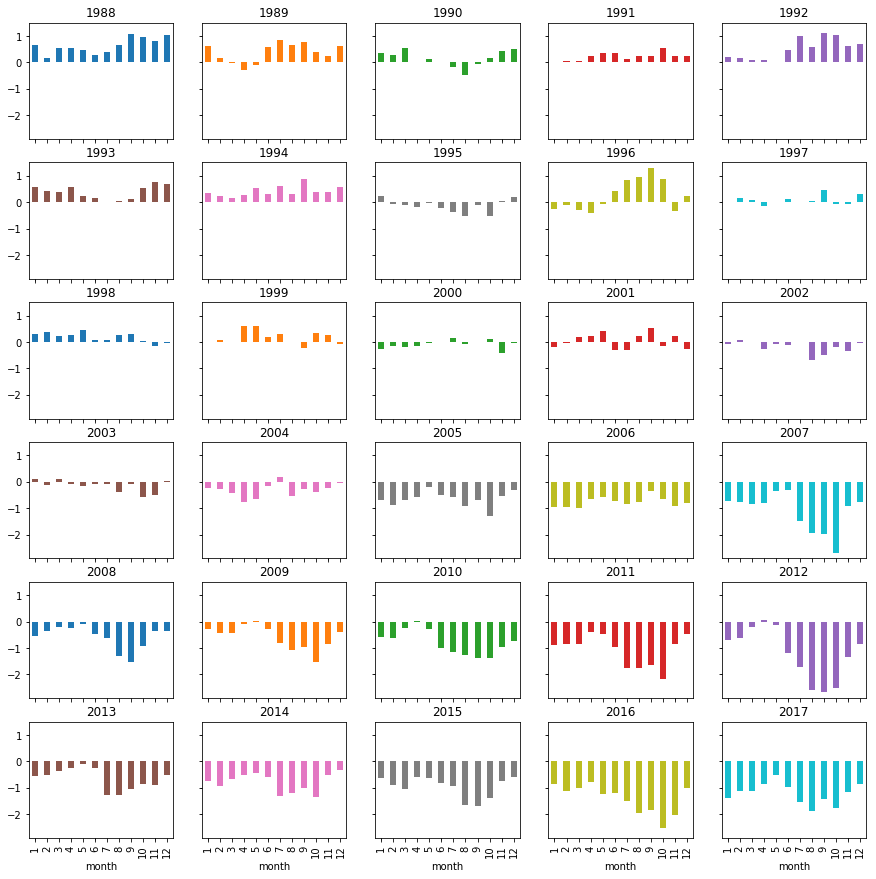

In [63]:
sea_ice_month_year_diff.loc[:, 1988:2017].plot(legend=None, subplots=True, layout=(6, 5), sharey=True, figsize=(15, 15), kind='bar');

Similar plot, with each month in a subplot, trend over years.

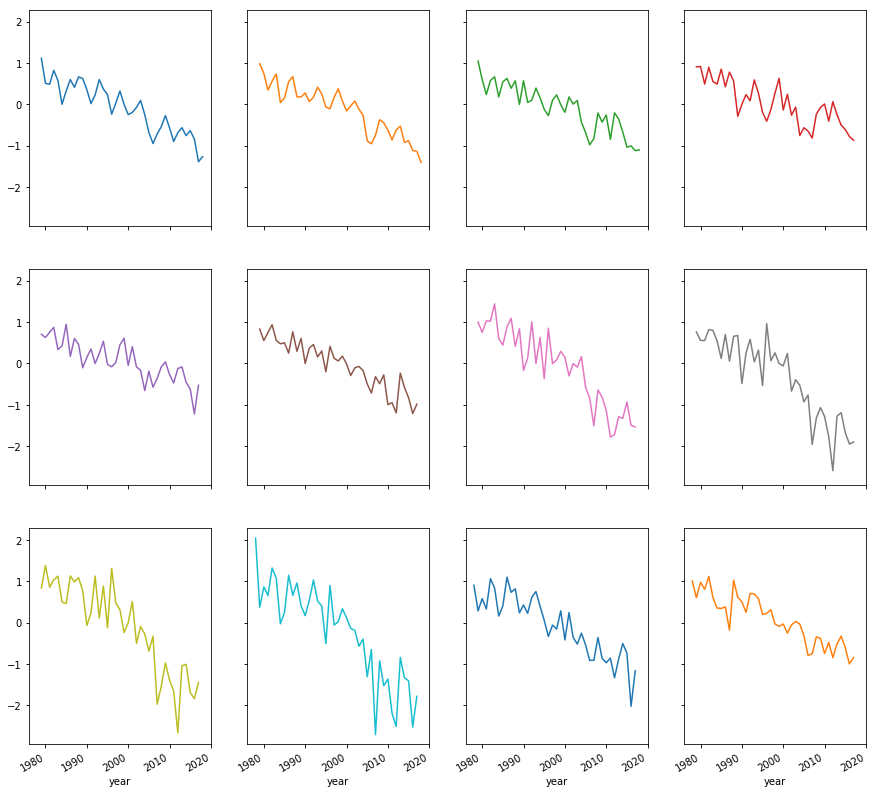

In [98]:
sea_ice_month_year_diff.T.plot(legend=None, subplots=True, layout=(3, 4), sharey=True, figsize=(15, 15), kind='line');

## Colouring the data
Pandas doesn't make it easy to have each bar in a chart have a different colour depending on its value. Therefore, we'll create a separate dataframe with the colour that each data point should be plotted with.

To start with, normalise the data, so that the data ranges from 0 to 1.

In [57]:
sid_max = sea_ice_month_year_diff.max().max()
sid_min = sea_ice_month_year_diff.min().min()
sea_ice_month_year_dnorm = (sea_ice_month_year_diff - sid_min) / (sid_max - sid_min)
sea_ice_month_year_dnorm

year,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.804426,0.676712,0.672287,0.742887,0.691675,0.570074,0.637935,0.696101,0.656270,...,0.512540,0.450369,0.380611,0.425711,0.451001,0.410537,0.436038,0.393256,0.277555,0.303477
2,NaN,0.776607,0.727503,0.642360,0.688303,0.724552,0.578609,0.602318,0.685142,0.711275,...,0.475869,0.438145,0.388303,0.439515,0.459009,0.375869,0.384615,0.335195,0.330137,0.274183
3,NaN,0.789884,0.696207,0.619705,0.691465,0.710116,0.607482,0.684510,0.701897,0.651739,...,0.479347,0.515595,0.391465,0.526765,0.495153,0.428346,0.351633,0.358166,0.334141,0.337513
4,NaN,0.760485,0.762381,0.673235,0.758588,0.685669,0.673024,0.748894,0.659115,0.733930,...,0.553741,0.571865,0.484089,0.583456,0.517176,0.463962,0.441728,0.406006,0.386934,NaN
5,NaN,0.718862,0.702213,0.729294,0.754057,0.641201,0.659431,0.769652,0.606112,0.697576,...,0.578504,0.514015,0.470601,0.544362,0.552582,0.474394,0.439831,0.312961,0.459431,NaN
6,NaN,0.745416,0.686617,0.727924,0.767334,0.688093,0.670390,0.675659,0.622550,0.731507,...,0.512118,0.360274,0.370390,0.318335,0.520759,0.448683,0.395785,0.315174,0.362803,NaN
7,NaN,0.781349,0.727819,0.786723,0.785880,0.873762,0.697155,0.663751,0.756586,0.800316,...,0.398525,0.330453,0.195574,0.207587,0.299052,0.290411,0.374499,0.255005,0.247208,NaN
8,NaN,0.730664,0.687250,0.687039,0.742466,0.738988,0.685564,0.595785,0.717808,0.581876,...,0.345416,0.300105,0.196839,0.024236,0.301370,0.319916,0.218124,0.159747,0.169863,NaN
9,NaN,0.747102,0.861538,0.750474,0.788409,0.806955,0.675448,0.667018,0.808430,0.777977,...,0.365648,0.277766,0.221075,0.008746,0.351212,0.357956,0.214647,0.182929,0.266280,NaN


Now use the `matplotlib` color map to find the colour of each value.

Note that we're doing `1 - value` to make the map scale from blue at high values to magenta at low ones, the opposite of what it normally does.

In [77]:
cmap = cm.get_cmap('cool')
sea_ice_month_year_colour = (1 - sea_ice_month_year_dnorm).applymap(cmap)
sea_ice_month_year_colour

year,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,,,,
1,"(0.0, 1.0, 1.0, 1.0)","(0.19607843137254902, 0.803921568627451, 1.0, ...","(0.32156862745098036, 0.6784313725490196, 1.0,...","(0.3254901960784314, 0.6745098039215687, 1.0, ...","(0.2549019607843137, 0.7450980392156863, 1.0, ...","(0.3058823529411765, 0.6941176470588235, 1.0, ...","(0.43137254901960786, 0.5686274509803921, 1.0,...","(0.3607843137254902, 0.6392156862745098, 1.0, ...","(0.30196078431372547, 0.6980392156862745, 1.0,...","(0.3411764705882353, 0.6588235294117647, 1.0, ...",...,"(0.48627450980392156, 0.5137254901960784, 1.0,...","(0.5490196078431373, 0.4509803921568627, 1.0, ...","(0.6196078431372549, 0.3803921568627451, 1.0, ...","(0.5764705882352941, 0.42352941176470593, 1.0,...","(0.5490196078431373, 0.4509803921568627, 1.0, ...","(0.5882352941176471, 0.4117647058823529, 1.0, ...","(0.5647058823529412, 0.43529411764705883, 1.0,...","(0.6078431372549019, 0.3921568627450981, 1.0, ...","(0.7215686274509804, 0.2784313725490196, 1.0, ...","(0.6980392156862745, 0.3019607843137255, 1.0, ..."
2,"(0.0, 1.0, 1.0, 1.0)","(0.22352941176470587, 0.7764705882352941, 1.0,...","(0.27058823529411763, 0.7294117647058824, 1.0,...","(0.3568627450980392, 0.6431372549019607, 1.0, ...","(0.30980392156862746, 0.6901960784313725, 1.0,...","(0.27450980392156865, 0.7254901960784313, 1.0,...","(0.4196078431372549, 0.580392156862745, 1.0, 1.0)","(0.396078431372549, 0.603921568627451, 1.0, 1.0)","(0.3137254901960784, 0.6862745098039216, 1.0, ...","(0.28627450980392155, 0.7137254901960784, 1.0,...",...,"(0.5254901960784314, 0.4745098039215686, 1.0, ...","(0.5607843137254902, 0.4392156862745098, 1.0, ...","(0.611764705882353, 0.388235294117647, 1.0, 1.0)","(0.5607843137254902, 0.4392156862745098, 1.0, ...","(0.5411764705882353, 0.45882352941176474, 1.0,...","(0.6235294117647059, 0.3764705882352941, 1.0, ...","(0.615686274509804, 0.38431372549019605, 1.0, ...","(0.6666666666666666, 0.33333333333333337, 1.0,...","(0.6705882352941176, 0.3294117647058824, 1.0, ...","(0.7254901960784313, 0.27450980392156865, 1.0,..."
3,"(0.0, 1.0, 1.0, 1.0)","(0.20784313725490194, 0.7921568627450981, 1.0,...","(0.30196078431372547, 0.6980392156862745, 1.0,...","(0.3803921568627451, 0.6196078431372549, 1.0, ...","(0.3058823529411765, 0.6941176470588235, 1.0, ...","(0.2901960784313725, 0.7098039215686275, 1.0, ...","(0.39215686274509803, 0.607843137254902, 1.0, ...","(0.3137254901960784, 0.6862745098039216, 1.0, ...","(0.2980392156862745, 0.7019607843137254, 1.0, ...","(0.34901960784313724, 0.6509803921568628, 1.0,...",...,"(0.5215686274509804, 0.4784313725490196, 1.0, ...","(0.48627450980392156, 0.5137254901960784, 1.0,...","(0.6078431372549019, 0.3921568627450981, 1.0, ...","(0.4745098039215686, 0.5254901960784314, 1.0, ...","(0.5058823529411764, 0.49411764705882355, 1.0,...","(0.5725490196078431, 0.4274509803921569, 1.0, ...","(0.6470588235294118, 0.3529411764705882, 1.0, ...","(0.6431372549019607, 0.3568627450980393, 1.0, ...","(0.6666666666666666, 0.33333333333333337, 1.0,...","(0.6627450980392157, 0.33725490196078434, 1.0,..."
4,"(0.0, 1.0, 1.0, 1.0)","(0.2392156862745098, 0.7607843137254902, 1.0, ...","(0.23529411764705882, 0.7647058823529411, 1.0,...","(0.3254901960784314, 0.6745098039215687, 1.0, ...","(0.2392156862745098, 0.7607843137254902, 1.0, ...","(0.3137254901960784, 0.6862745098039216, 1.0, ...","(0.3254901960784314, 0.6745098039215687, 1.0, ...","(0.25098039215686274, 0.7490196078431373, 1.0,...","(0.3411764705882353, 0.6588235294117647, 1.0, ...","(0.26666666666666666, 0.7333333333333334, 1.0,...",...,"(0.44705882352941173, 0.5529411764705883, 1.0,...","(0.42745098039215684, 0.5725490196078431, 1.0,...","(0.5176470588235293, 0.48235294117647065, 1.0,...","(0.4156862745098039, 0.5843137254901961, 1.0, ...","(0.4823529411764706, 0.5176470588235293, 1.0, ...","(0.5372549019607843, 0.4627450980392157, 1.0, ...","(0.55

Quick check it works for one chart.

<BarContainer object of 12 artists>

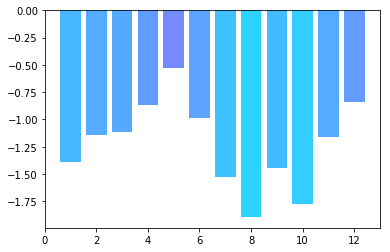

In [68]:
plt.bar(sea_ice_month_year_diff.index, sea_ice_month_year_diff[2017], color=sea_ice_month_year_colour[2017])

Now replot the data for each year, but using the colours we manually specified.

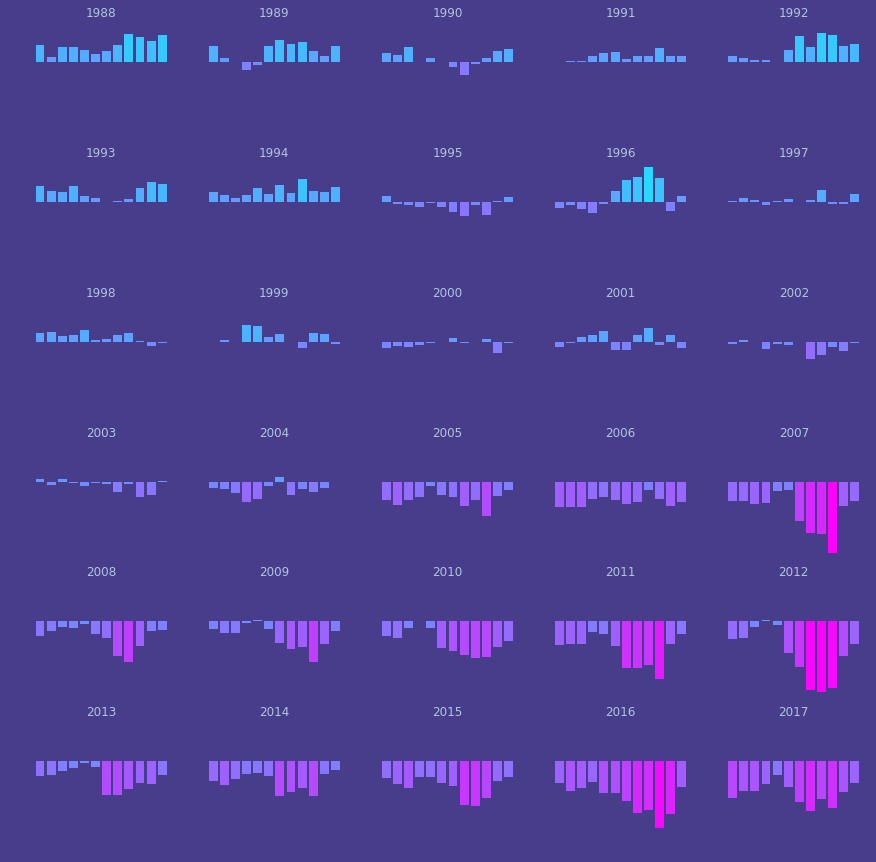

In [137]:
# sea_ice_month_year_diff.loc[:, 1988:2017].plot(legend=None, subplots=True, layout=(6, 5), sharey=True, figsize=(15, 15), kind='bar', color=sea_ice_month_year_colour);
f, axes = plt.subplots(6, 5, sharey=True, figsize=(15, 15), facecolor='darkslateblue')
for r, row in enumerate(axes):
    for c, ax in enumerate(row):
        yr = 1988 + r * 5 + c
        ax.bar(sea_ice_month_year_diff.index, 
               sea_ice_month_year_diff[yr], 
               color=sea_ice_month_year_colour[yr])
        ax.set_frame_on(False)
        ax.set_axis_off()
        ax.set_title(str(yr), color='lightsteelblue')
#         ax.set_facecolor('darkslateblue')

And again, plot for each month, one bar per year. 

Restrict to just the past 30 years of full data.

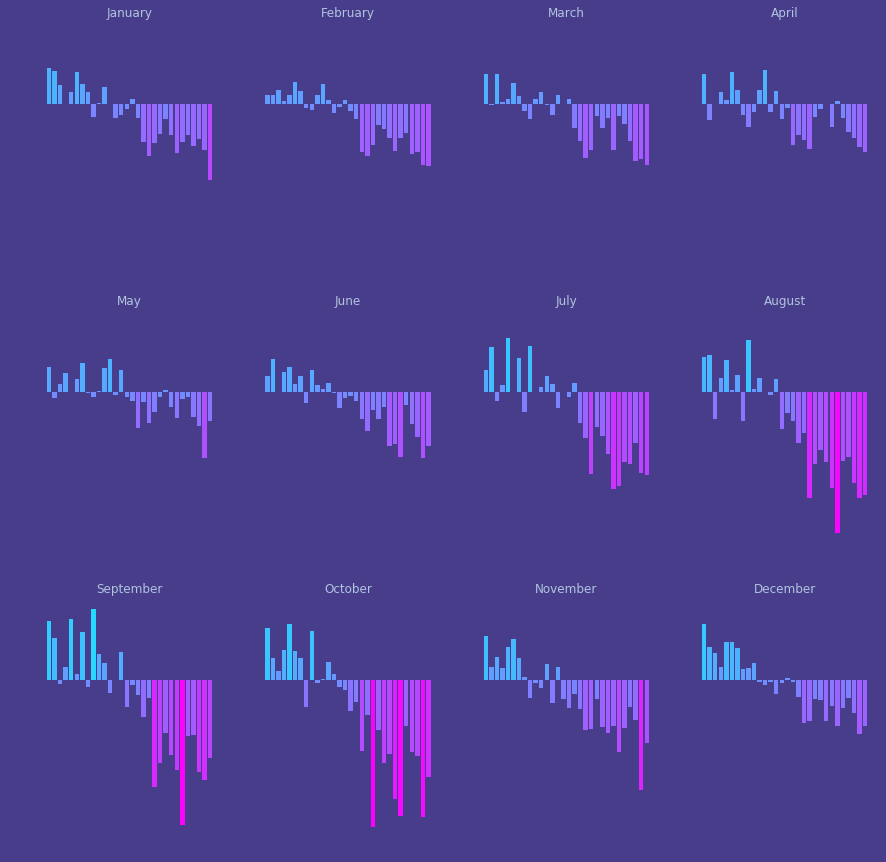

In [142]:
# sea_ice_month_year_diff.loc[:, 1988:2017].plot(legend=None, subplots=True, layout=(6, 5), sharey=True, figsize=(15, 15), kind='bar', color=sea_ice_month_year_colour);
f, axes = plt.subplots(3, 4, sharey=True, figsize=(15, 15), facecolor='darkslateblue')
for r, row in enumerate(axes):
    for c, ax in enumerate(row):
        mt = r * 4 + c + 1
        ax.bar(sea_ice_month_year_diff.loc[:, 1988:2017].T.index, 
               sea_ice_month_year_diff.loc[:, 1988:2017].T[mt], 
               color=sea_ice_month_year_colour.loc[:, 1988:2017].T[mt])
        ax.set_frame_on(False)
        ax.set_axis_off()
        ax.set_title(datetime(1900, mt, 1).strftime('%B'), color='lightsteelblue')